<a href="https://colab.research.google.com/github/Elenamen/password-strength-NLP/blob/main/password_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report


In [3]:
# data = pd.read_csv(r'C:\Users\Elena\Desktop\tutorials\Data Science Real World Projs\Predict password strength\data.csv', error_bad_lines=False)
data = pd.read_csv('data.csv', error_bad_lines=False)

Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields, saw 5
Skipping line 36550: expected 2 fields, saw 5
Skipping line 38732: expected 2 fields, saw 5
Skipping line 40567: expected 2 fields, saw 5
Skipping line 40576: expected 2 fields, saw 5
Skipping line 41864: expected 2 field

lets play with the data

In [4]:
data['strength'].unique()
data.isnull().sum()
data[data['password'].isna()]

,password,strength


In [5]:
data.dropna(inplace=True)

<Axes: xlabel='strength', ylabel='count'>

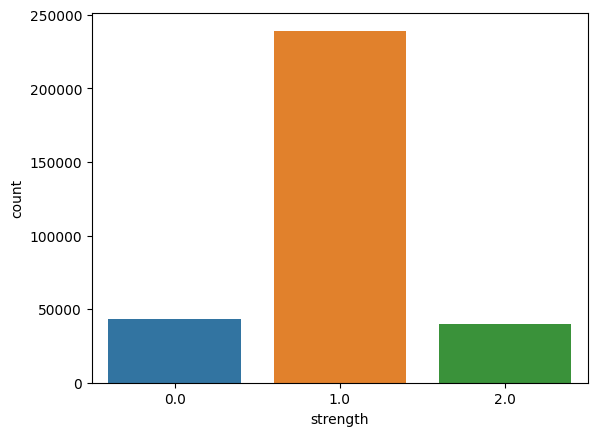

In [50]:
sns.countplot(x=data['strength'])


In [7]:
password_tuple = np.array(data)


Shuffling for robustness

In [8]:
random.shuffle(password_tuple)

In [9]:
x = [ password[0] for password in password_tuple]
y = [ label[1] for label in password_tuple]

In [10]:
def word_to_chars(word):
    chars = [char for char in word]
    return chars

TF-IDF vectorizer to convert string data into numerical data

In [16]:
vectorizer = TfidfVectorizer(tokenizer=word_to_chars)
X = vectorizer.fit_transform(x)

In [14]:
vectorizer = TfidfVectorizer()

In [18]:
vectorizer.get_feature_names_out()

array(['\x05', '\x06', '\x08', '\x10', '\x16', '\x17', '\x19', '\x1b',
       '\x1c', '\x1e', ' ', '!', '"', '#', '$', '%', '&', '(', ')', '*',
       '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`',
       'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
       '{', '|', '}', '~', '\x7f', '¡', '¨', '«', '°', '±', '²', '³', '´',
       '·', 'º', '¾', '¿', 'ß', 'á', 'â', 'ä', 'å', 'æ', 'é', 'ê', 'í',
       'ð', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ú', 'û', 'ü', 'þ', 'ÿ', '‚'],
      dtype=object)

In [ ]:
first_document_vector = X[0]
first_document_vector.T.todense()

In [28]:
df = pd.DataFrame(first_document_vector.T.todense(), index=vectorizer.get_feature_names_out(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'], ascending=False).head(15)

,TF-IDF
7,0.592753
5,0.566196
z,0.335912
k,0.291706
d,0.285235
e,0.220856
±,0.000000
°,0.000000
«,0.000000
¨,0.000000


Apply logistic regression on data as use case classification

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(257869, 111)

In [37]:
clf = LogisticRegression(random_state=0,multi_class='multinomial')
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [39]:
random_test = np.array(['%@123abcd'])
pred = vectorizer.transform(random_test)
clf.predict(pred)

array([2.])

In [41]:
y_pred = clf.predict(X_test)
y_pred

array([1., 1., 2., ..., 1., 1., 1.])

Check the accuracy of your model using confusion matrix, accuracy score


In [45]:
conf_mat = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(conf_mat)
print('Total model accuracy: ',accuracy)

[[ 2393  6214     5]
 [ 1750 44857  1211]
 [   29  2527  5482]]
Total model accuracy:  0.81795619532171


In [47]:
clas_report = classification_report(y_test,y_pred)
print(clas_report)

              precision    recall  f1-score   support

         0.0       0.57      0.28      0.37      8612
         1.0       0.84      0.94      0.88     47818
         2.0       0.82      0.68      0.74      8038

    accuracy                           0.82     64468
   macro avg       0.74      0.63      0.67     64468
weighted avg       0.80      0.82      0.80     64468

